In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import spacy
nlp = spacy.load('pt')


df = pd.read_csv('../dados_categorizados_completo_novo.csv')
df.head()

,Id,Enunciado,Tópico,Contexto
0,994,Meu primeiro programa\nEscreva um programa que...,Ambientação,Outros
1,996,Impressão de caracteres na tela\nEscreva um pr...,Ambientação,Outros
2,999,Impressão de caracteres na tela (Bart Simpson)...,Ambientação,Outros
3,1000,Operadores aritméticos\nQual o valor de X para...,Ambientação,Matemático
4,578,Operadores aritméticos \nQual o valor de Y par...,Ambientação,Matemático


In [3]:
df.shape

(1045, 4)

In [4]:
df.Tópico.value_counts()

Estrutura condicional encadeada        161
Vetor                                  160
Variáveis e Estrutura Sequencial       157
Estrutura condicional composta         136
Matrizes                               134
Estrutura de repetição por contagem    117
Estrutura de repetição por condição    114
Strings                                 47
Ambientação                             19
Name: Tópico, dtype: int64

In [5]:
X = df['Enunciado']
y = df['Tópico']

## Criando a base de validação

In [6]:
from sklearn.model_selection import StratifiedKFold
vetor_X_train=[]
vetor_y_train=[]
vetor_X_test=[]
vetor_y_test=[]
split = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
for train_index, val_index in split.split(X, y):
    vetor_X_train+=[X.iloc[train_index]]
    vetor_X_test+=[X.iloc[val_index]]
    vetor_y_train+=[y[train_index]]
    vetor_y_test+=[y[val_index]]

In [7]:
def get_new_sentences(da):
    strings=[]
    for elemento in da['Enunciado']:
        if(len(da)+len(strings)<maximum):
            contador=0
            lista=elemento.split()
            while(contador<len(lista)):
                if(lista[contador] in synonyms_lexicon):
                    lista[contador]=synonyms_lexicon[lista[contador]][0]
                contador+=1
            strings+=[' '.join(lista)]
        else:
            break
    
    new_sentences = pd.Series(strings)
    return new_sentences

def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

synonyms_lexicon = get_synonyms_lexicon('./arq3.txt')

class LemmaTokenizer(object):
    def __call__(self, text):
        doc=nlp(text)
        tokens=[]
        for token in doc:
            if(token.text.isalpha() and len(token.text)>=2):
                tokens+=[token]
        return [t.lemma_ for t in tokens if t not in nlp.Defaults.stop_words]
pipeline= LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.001,
    C=10.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=10,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=10000,
)

In [8]:
contador=0
predictions=[]
while(contador<len(vetor_X_train)):
    X_train=vetor_X_train[contador]
    y_train=vetor_y_train[contador]
    X_test=vetor_X_test[contador]
    y_test=vetor_y_test[contador]
   
    text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=nlp.Defaults.stop_words,
                            tokenizer=LemmaTokenizer())),
                     ('clf',pipeline),
    ])
    text_clf_lsvc2.fit(X_train, y_train)

    predictions+=[text_clf_lsvc2.predict(X_test)]

    contador+=1

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['acercar', 'algum', 'antar', 'apoiar', 'baixar', 'caminhar', 'ceder', 'cincar', 'comer', 'conhecer', 'custar', 'dever', 'devir', 'direito', 'entrar', 'estevar', 'estivar', 'falto', 'formar', 'grupar', 'irar', 'ligar', 'mear', 'nado', 'nenhum', 'nó', 'o', 'obrigar', 'oitavar', 'orar', 'outro', 'parecer', 'parir', 'pelar', 'pontar', 'pôr', 'quantum', 'quartar', 'querer', 'quietar', 'quintar', 'segundar', 'seriar', 'sobrar', 'suar', 'tardar', 'terceirar', 'umar', 'vezar', 'vir', 'vário'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
y_pred=[]
for lista in predictions:
    for elemento in lista:
        y_pred+=[elemento]
        
y_test_sla=[]
for lista in vetor_y_test:
    for elemento in lista:
        y_test_sla+=[elemento]

In [10]:
print(metrics.confusion_matrix(y_test_sla,y_pred))

[[ 14   1   0   1   0   0   0   3   0]
 [  0  81  29   4   1   0   0  19   2]
 [  1   9 132   0   8   2   0   7   2]
 [  0  17   4  71   8   4   0   7   3]
 [  0   3   1   6  89   0   3   4  11]
 [  0   2   5   0   1 123   0   2   1]
 [  0   1   0   0   2   1  40   0   3]
 [  0  21   9   4   4   3   0 112   4]
 [  0   7   3   2   5   0   1   3 139]]


In [11]:
print(metrics.classification_report(y_test_sla,y_pred))

                                     precision    recall  f1-score   support

                        Ambientação       0.93      0.74      0.82        19
     Estrutura condicional composta       0.57      0.60      0.58       136
    Estrutura condicional encadeada       0.72      0.82      0.77       161
Estrutura de repetição por condição       0.81      0.62      0.70       114
Estrutura de repetição por contagem       0.75      0.76      0.76       117
                           Matrizes       0.92      0.92      0.92       134
                            Strings       0.91      0.85      0.88        47
   Variáveis e Estrutura Sequencial       0.71      0.71      0.71       157
                              Vetor       0.84      0.87      0.86       160

                           accuracy                           0.77      1045
                          macro avg       0.80      0.77      0.78      1045
                       weighted avg       0.77      0.77      0.77      10

In [12]:
print(metrics.accuracy_score(y_test_sla,y_pred))

0.7665071770334928


In [13]:
mat_etc = confusion_matrix(y_test_sla, y_pred)

In [14]:
row_sums = mat_etc.sum(axis=1, keepdims=True)
norm_conf_mx = mat_etc / row_sums

In [20]:
labels = ['Ambientação', 'Estrutura condicional composta'
          , 'Estrutura condicional encadeada', 'Estrutura de repetição por condição'
          , 'Estrutura de repetição por contagem', 'Matrizes', 'Strings'
          , 'Variáveis e Estrutura Sequencial', 'Vetor']

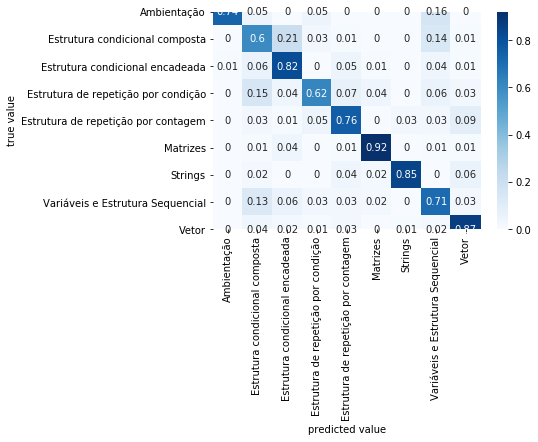

In [21]:
sns.heatmap(pd.DataFrame(norm_conf_mx.round(2),columns=labels, index=labels), 
            annot=True, fmt='g', cmap='Blues')

plt.xlabel('predicted value')

plt.ylabel('true value');